In [1]:
import sys
import os
# Add the parent directory of `notebook/` to sys.path
sys.path.append(os.path.abspath(".."))

import torch
palette = ['#43AA8B', '#F8961E', '#F94144']
sub = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

# data pre-processing and visualization
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d


# utilities
from utils.utils_data import (load_data, format_chemical_formula)
from e3nn.io import CartesianTensor

bar_format = '{l_bar}{bar:10}{r_bar}{bar:-10b}'
default_dtype = torch.float64
torch.set_default_dtype(default_dtype)

# Create a colormap based on the number of unique symbols
datasets = ['g', 'y', 'r']
colors = dict(zip(datasets, palette))
cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', [palette[k] for k in [0,2,1]])
mpl.rcParams['font.family'] = 'Arial'
font_size = 20  # or whatever size you want globally

mpl.rcParams.update({
    "font.size": font_size,           # Universal font size
    "axes.titlesize": font_size,       # Axes title
    "axes.labelsize": font_size,       # Axes labels
    "xtick.labelsize": font_size - 2,  # X tick labels
    "ytick.labelsize": font_size - 2,  # Y tick labels
    "legend.fontsize": font_size - 2,  # Legend text
    "figure.titlesize": font_size + 2, # Figure title
    "font.family": "Arial"             # Optional: use Arial everywhere
})

# Check device
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print('torch device:' , device)

## load data
data_file = '../dataset/symmetrized_dataset.pkl'
df, species = load_data(data_file)
df = df.reset_index(drop=True)

print('data acquired')

energy_min = 0 #Unit of energy in eV
energy_max = 30 #Unit of energy in eV
nstep = 300 #Number of the energy points

new_x = np.linspace(energy_min, energy_max, nstep)
def interpolate_matrix(row, column):
    """Interpolates the full (3001, 3, 3) matrix along the energy axis."""
    matrix = row[column]  # Shape: (3001, 3, 3)
    omega = row['omega']  # Shape: (3001,)

    # Define interpolation along the first axis (energy axis)
    interp = interp1d(omega, matrix, kind='linear', axis=0, fill_value=0, bounds_error=False)

    # Apply interpolation to the new energy points
    new_matrix = interp(new_x)  # Result shape: (301, 3, 3)
    
    return new_matrix


# Apply the custom function to create a new column
df['energies_interp'] = df.apply(lambda x: new_x, axis=1)
df['real_Permittivity_Matrices_interp'] = df.apply(lambda row: interpolate_matrix(row, 'real_symmetrized_permittivity'), axis=1)
df['imag_Permittivity_Matrices_interp'] = df.apply(lambda row: interpolate_matrix(row, 'imag_symmetrized_permittivity'), axis=1)

df.sample(10)

torch device: cuda:0
data acquired


,formula,symmetrized_structure,mp_id,bandgap,crystal_system,omega,species,real_symmetrized_permittivity,imag_symmetrized_permittivity,energies_interp,real_Permittivity_Matrices_interp,imag_Permittivity_Matrices_interp
576,H18Al6,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",mp-23933,2.1977,trigonal,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[H, Al]","[[[1.7822136909471855, -9.165122364744131e-17,...","[[[1.772462877753423e-18, -2.139922160430262e-...","[0.0, 0.10033444816053512, 0.20066889632107024...","[[[1.7822136909471855, -9.165122364744131e-17,...","[[[1.772462877753423e-18, -2.139922160430262e-..."
60,Au2Rb2Te2,"(Atom('Rb', [4.485675, 2.56915, 5.1843438], in...",mp-9008,1.1079,orthorhombic,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[Rb, Te, Au]","[[[4.017094954007221, 0.0, 0.0], [0.0, 1.64993...","[[[-3.0451976107890213e-18, -9.62964972193618e...","[0.0, 0.10033444816053512, 0.20066889632107024...","[[[4.017094954007221, 0.0, 0.0], [0.0, 1.64993...","[[[-3.0451976107890213e-18, -9.62964972193618e..."
172,O6W2,"(Atom('W', [5.6507249999999996, 0.0, 0.2498527...",mp-2285488,1.2139,orthorhombic,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[W, O]","[[[3.7107164926076495, 0.0, 0.0], [0.0, 3.7350...","[[[-8.070535873674241e-18, -1.925929944387236e...","[0.0, 0.10033444816053512, 0.20066889632107024...","[[[3.7107164926076495, 0.0, 0.0], [0.0, 3.7350...","[[[-8.070535873674241e-18, -1.925929944387236e..."
597,Mg4S4,"(Atom('Mg', [0.0, 0.0, 0.0], index=0), Atom('M...",mp-1315,2.7574,cubic,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[S, Mg]","[[[2.445440335824653, 1.378634354255046e-25, 1...","[[[1.8032200219992106e-18, 0.0, 0.0], [0.0, 1....","[0.0, 0.10033444816053512, 0.20066889632107024...","[[[2.445440335824653, 1.378634354255046e-25, 1...","[[[1.8032200219992106e-18, 0.0, 0.0], [0.0, 1...."
90,AsNSr3,"(Atom('Sr', [0.0, 2.54785, 2.54785], index=0),...",mp-1013555,0.4218,cubic,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[Sr, As, N]","[[[5.081758816005318, -1.1293772630057337e-21,...","[[[-4.759341030932212e-17, 0.0, 0.0], [0.0, -4...","[0.0, 0.10033444816053512, 0.20066889632107024...","[[[5.081758816005318, -1.1293772630057337e-21,...","[[[-4.759341030932212e-17, 0.0, 0.0], [0.0, -4..."
1241,Bi3K3S6,"(Atom('K', [-6.469639638832331e-17, 2.38208947...",mp-1223443,1.4158,trigonal,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[K, Bi, S]","[[[4.428785005052027, 1.3299546649155522e-16, ...","[[[-3.037632858026977e-18, -2.139922160430262e...","[0.0, 0.10033444816053512, 0.20066889632107024...","[[[4.428785005052027, 1.3299546649155522e-16, ...","[[[-3.037632858026977e-18, -2.139922160430262e..."
466,C2Al2Mg,"(Atom('Mg', [0.0, 0.0, 0.0], index=0), Atom('A...",mp-9514,1.7481,trigonal,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[C, Al, Mg]","[[[3.4624996708230213, 9.93129189996722e-17, 8...","[[[6.102195227683808e-18, 0.0, -2.888894916580...","[0.0, 0.10033444816053512, 0.20066889632107024...","[[[3.4624996708230213, 9.93129189996722e-17, 8...","[[[6.102195227683808e-18, 0.0, -2.888894916580..."
19,Cd4S4,"(Atom('Cd', [0.0, 0.0, 0.0], index=0), Atom('C...",mp-2469,1.0492,cubic,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[Cd, S]","[[[2.5933879639852644, 0.0, 0.0], [0.0, 2.5933...","[[[-3.3894422386212096e-18, 8.024708101613482e...","[0.0, 0.10033444816053512, 0.20066889632107024...","[[[2.5933879639852644, 0.0, 0.0], [0.0, 2.5933...","[[[-3.3894422386212096e-18, 8.024708101613482e..."
273,Pb4SSe3,"(Atom('Pb', [0.0, 0.0, 3.1287737520000003], in...",mp-1219970,0.3852,tetragonal,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[Pb, S, Se]","[[[10.298023708674542, 0.0, 0.0], [0.0, 10.298...","[[[-1.1679935310177392e-18, 0.0, 0.0], [0.0, -...","[0.0, 0.10033444816053512, 0.20066889632107024...","[[[10.298023708674542, 0.0, 0.0], [0.0, 10.298...","[[[-1.1679935310177392e-18, 0.0, 0.0], [0.0, -..."
500,Ba4S8Zr2,"(Atom('Ba', [2.4946, 2.4946, 2.252518487999998...",mp-

In [2]:
def compute_anisotropy_ratio(tensor_list):
    # tensor_list: shape [n_freq, 3, 3]
    ratios = []
    for eps in tensor_list:
        # Use imaginary part (already interpolated)
        eps_H = (eps + eps.T.conj()) / 2  # ensure Hermitian
        eigvals = np.linalg.eigvalsh(eps_H)  # safe for Hermitian matrices
        max_eig = np.max(np.abs(eigvals))
        min_eig = np.min(np.abs(eigvals))
        ratio = max_eig / min_eig if min_eig > 1e-8 else np.inf
        ratios.append(ratio)
    return np.array(ratios)  # shape: [n_freq]
df['anisotropy_ratio'] = df['imag_Permittivity_Matrices_interp'].map(compute_anisotropy_ratio)


triclinic


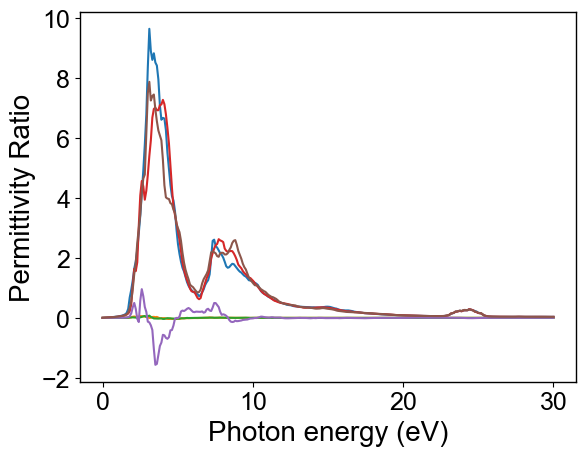

1.231174057058822


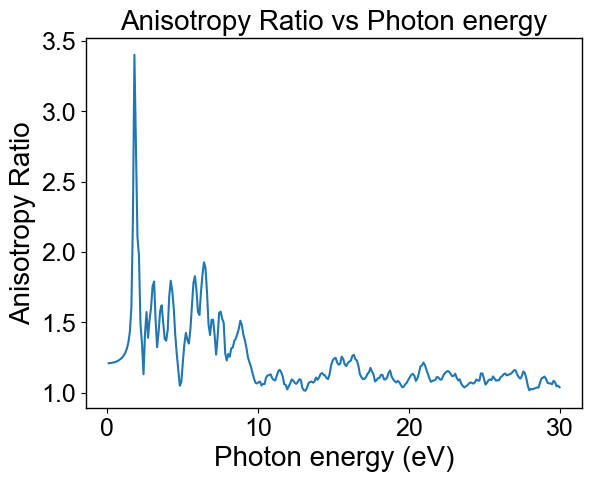

In [ ]:
k = 9 # monoclinic
k = 585 # triclinic
for i in range(3):
    for j in range(i,3):
        plt.plot(df.iloc[k]["energies_interp"], df.iloc[k]["imag_Permittivity_Matrices_interp"][:,i,j])
print(df.iloc[k]["crystal_system"])
plt.xlabel("Photon energy (eV)")
plt.ylabel("Permittivity Ratio")
plt.show()


ratio = df['anisotropy_ratio'].iloc[k]
mean_ratio = np.nanmean(ratio[np.isfinite(ratio)])
print(mean_ratio)
plt.plot(df['energies_interp'].iloc[k], df['anisotropy_ratio'].iloc[k])
plt.xlabel("Photon energy (eV)")
plt.ylabel("Anisotropy Ratio")
plt.title("Anisotropy Ratio vs Photon energy")
plt.show()

In [15]:
from e3nn.o3 import Irreps
CartesianTensor("ijk=ikj") 
# Define the symmetric 3rd-rank tensor with ijk = ikj symmetry
T = CartesianTensor("ijk=ikj")

# Print the irreps (spherical harmonic decomposition)
print("Irreps:", Irreps(T))

# Print the total number of independent components (length of the tensor)
print("Total dim:", Irreps(T).dim)



Irreps: 2x1o+1x2o+1x3o
Total dim: 18
